In [1]:
!pip install feature_engine
!pip install xgboost
!pip install shap

  Using cached shap-0.40.0.tar.gz (371 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/lorenaneves/opt/anaconda3/bin/python /Users/lorenaneves/opt/anaconda3/lib/python3.8/site-packages/pip/_vendor/pep517/_in_process.py build_wheel /var/folders/23/k7qxxfjn4svc3wrnj6s1w1bm0000gn/T/tmps2nsbqow
       cwd: /private/var/folders/23/k7qxxfjn4svc3wrnj6s1w1bm0000gn/T/pip-install-tba4r1ot/shap_fee2a5db5a9e442898fb27ee266cbe37
  Complete output (123 lines):
  The nvcc binary could not be located in your $PATH. Either  add it to your path, or set $CUDAHOME to enable CUDA
  Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build

In [2]:
from feature_engine.encoding import OneHotEncoder
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.selection import SelectByShuffling
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import gc
from sklearn.metrics import roc_curve, auc
import gc
gc.collect()
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
### Download_Da_Base
data_xls = pd.read_excel('Dry_Bean_Dataset.xlsx')

### Converte_Para_CSV
data_xls.to_csv('csvfile.csv')

In [4]:
#Edata_xls.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
##Entender_os_Dados

print(data_xls.shape)
#13611 graos
##17 features

#Classificacoes_Possiveis
(data_xls['Class'].unique())
#['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']

#Classificacoes_Distribuicao
print(data_xls.groupby('Class').size())

#Class
#BARBUNYA    1322
#BOMBAY       522
#CALI        1630
#DERMASON    3546
#HOROZ       1928
#SEKER       2027
#SIRA        2636
#dtype: int64

(13611, 17)
Class
BARBUNYA    1322
BOMBAY       522
CALI        1630
DERMASON    3546
HOROZ       1928
SEKER       2027
SIRA        2636
dtype: int64


/Users/lorenaneves/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


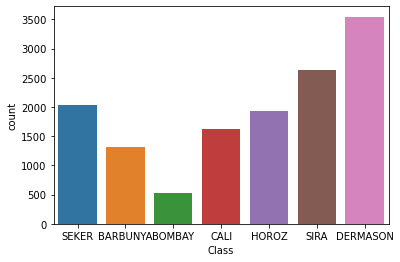

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data_xls['Class'],label="Count")
plt.show()

In [7]:
#Transformar_Categoricas_em_Numericas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x = data_xls['Class']
y = label_encoder.fit_transform(x)
class_cat = label_encoder.fit_transform(x)
print(y)

[5 5 5 ... 3 3 3]


In [10]:
for i in range(0, len(y)):    
    print(y[i]),    

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [11]:
variaveis = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 
             'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
             'ShapeFactor3', 'ShapeFactor4']
X = data_xls[variaveis]
print(X)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [12]:
#Train_VS_Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Support_Vector_Machine
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.92
Accuracy of SVM classifier on test set: 0.93


In [14]:
#Gaussian_Naive_Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.90
Accuracy of GNB classifier on test set: 0.90


In [16]:
#Arvore_de_Decisao
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.89


In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.71


In [20]:
import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7,test_size=0.3, random_state=42)
print ("X_train: ", X_train)
print ("y_train: ", y_train)
print("X_test: ", X_test)
print ("y_test: ", y_test)

X_train:           Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
11380   30210    651.194       254.800257       151.387457      1.683100   
10592   26989    603.446       209.236366       164.968662      1.268340   
3130    79508   1120.351       410.471774       248.306459      1.653085   
5861    47394    880.106       365.540272       165.751428      2.205352   
3405   145339   1465.758       543.258451       342.468755      1.586301   
...       ...        ...              ...              ...           ...   
5191    83266   1117.778       448.473710       237.747098      1.886348   
13418   39857    755.392       283.623668       179.430885      1.580685   
5390    90004   1156.599       456.836383       252.353553      1.810303   
860     38426    711.412       246.696608       198.555755      1.242455   
7270    63628    997.390       400.784151       204.033966      1.964301   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[175   0 156   0  53   0  11]
 [  0 161   0   0   0   0   0]
 [149   0 298   0  29   1   2]
 [  0   0   0 927   1  58  57]
 [ 54   0  27  18 385   2 102]
 [  2   0   1 127  11 371 107]
 [  0   0   0 102  70  39 588]]
              precision    recall  f1-score   support

           0       0.46      0.44      0.45       395
           1       1.00      1.00      1.00       161
           2       0.62      0.62      0.62       479
           3       0.79      0.89      0.84      1043
           4       0.70      0.65      0.68       588
           5       0.79      0.60      0.68       619
           6       0.68      0.74      0.71       799

    accuracy                           0.71      4084
   macro avg       0.72      0.71      0.71      4084
weighted avg       0.71      0.71      0.71      4084



([<matplotlib.axis.XTick at 0x7f922c74be80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

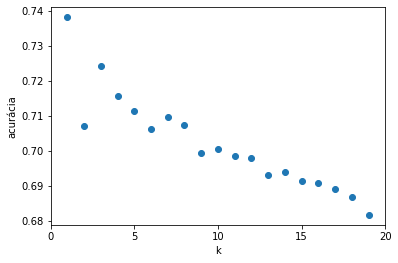

In [24]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('acurácia')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])